# **Introducción a Python**
# FP20. Expresiones Lambda, Map y Filter

Ahora es el momento de aprender sobre dos funciones integradas, `filter` y `map`. Una vez que aprendamos cómo funcionan, podemos aprender sobre la expresión `lambda`, que será útil cuando comiences a desarrollar más tus habilidades.

## <font color='blue'>**Función `map()`**</font>
La función `map()` te permite "asignar" una función a un objeto iterable (e.g. un string o una lista). Es decir, puedes llamar rápidamente a la misma función para todos los elementos que constituyen el objeto iterable.<br>
Veamos un ejemplo:

In [63]:
# Definimos una función
def square(num):
    return num ** 2

In [64]:
# Y ahora una lista
my_nums = [1, 2, 3, 4, 5]

Aplicamos `map` a la función y la lista (iterable)

In [65]:
map(square, my_nums)

No nos devuelve nada porque es un iterable. Hay que iterar sobre él, o desempaquetarlo o convertirlo en otro objeto (lista).

In [66]:
# Iteramos sobre el objeto map
for i in map(square, my_nums):
    print(i, end=' ')

1 4 9 16 25 

In [67]:
# Lo desempaquetamos dentro de un print()
print(*map(square, my_nums))

1 4 9 16 25


In [68]:
# O simplemente lo ponermos como argumento de la función list
list(map(square, my_nums))

[1, 4, 9, 16, 25]

In [69]:
mynames = ['Juan', 'Andrea', 'Julia', 'Beto', 'Zoe']

In [70]:
func_lower = str.lower

In [71]:
map(func_lower, mynames)

In [72]:
list(map(func_lower, mynames))

['juan', 'andrea', 'julia', 'beto', 'zoe']

Las funciones pueden ser mucho más complejas

In [73]:
def splicer(mystring):
    if len(mystring) % 2 == 0:
        return 'es par'
    else:
        return 'es impar'

In [74]:
mynames = ['Juan', 'Andrea', 'Julia', 'Beto', 'Zoe']

In [75]:
list(map(splicer,mynames))

['es par', 'es par', 'es impar', 'es par', 'es impar']

In [76]:
mi_texto = ['HOLA','chao']
upper = str.lower
list(map(upper,mi_texto))

['hola', 'chao']

## <font color='blue'>**Función `filter()`**</font>

La función `filter()` devuelve un iterador donde los elementos se filtran a través de una función para probar si el elemento es aceptado o no, i.e., que cumpla con una confición o no. Esto qué significa? Que debe filtrar por una función que devuelva `True` o `False`.

In [77]:
def check_even(num):
    """
    Esta función chequea si el número ingresado es par o impar
    Devuelve True o False
    """
    return num % 2 == 0

In [78]:
check_even(3)

False

In [79]:
check_even(8)

True

In [80]:
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Apliquémosla a una lista con una función `filter()`

In [81]:
filter(check_even, nums)

Nuevamente nos devuelve un iterador

In [82]:
even = filter(check_even, nums)
print(*even)

0 2 4 6 8 10


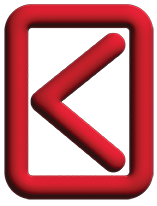
<br clear="left">
Contenido opcional



## <font color='blue'>**Generators (generadores)**</font>

Los generadores (**generators**) fueron introducidos en el [PEP255](https://www.python.org/dev/peps/pep-0255/). Son funciones especiales que retornan un iterador de tipo *lazzy*. Una **evaluación lazzy** es aquella que retrasa la evaluación de una expresión hasta el momento preciso en que se necesita su valor (evaluación no estricta) y no inmediatamente cuando aparece en nuestro código.

Como resultado de la generación *lazzy* (bajo demanda) de valores, se produce una mejora del rendimiento y un menor uso de memoria. Además, no necesitamos esperar hasta que se hayan generado todos los elementos antes de empezar a utilizarlos. Esto es similar a los beneficios proporcionados por los iteradores.

In [83]:
generador = filter(check_even, nums)

In [84]:
generador

In [85]:
# Ejecuta esta celda repetidas veces, verás como next( ) nos entrega un valor a la vez.
# Le pide a la función 'check_even' que genere un valor a la vez.
# Nota que en algún punto el generador se agota y ya no entrega más valores y devuelve un error
# de 'StopIteration'

next(generador)

0

Si quieres utilizar el generador deberás recrearlo nuevamente:
```Python
generador = filter(check_even, nums)
```
Como te habrás fijado, el generador devuelve un valor a la vez, lo cual es muy eficiente para el uso de memoria. Por ejemplo, si desempaquetas todos los elementos con una lista (`list()`):
```Python
list(generador)
```
... estarás utilizando el máximo de memoria asociado a la operación; si el generador es muy grande, podrías complicar el uso de memoria en tu equipo.

In [86]:
# La función map() también devuelve un generador
a = map(square, my_nums)
next(a)

1

In [87]:
next(a)

4

## <font color='blue'>**Funciones de usuario generadoras**</font>

Podemos definir nuestras propias funciones generadores, para ello utilizaremos la expresión `yield` en vez de `return` en ellas.

In [88]:
# Definimos una función generadora
# Nota el uso de 'yield' en vez de 'return'

def secuencia_infinita():
    num = 0
    while True:
        yield num
        num += 1

In [89]:
# Creamos un generador

generador_2 = secuencia_infinita()

In [90]:
next(generador_2)

0

In [91]:
next(generador_2)

1

In [92]:
generador_2.close()

In [93]:
# Esta celda dará un error ya que hemos cerrado (close) el generador
next(generador_2)

StopIteration: 

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>Actividad 1: </font>
### Crea un generador
Desarrolla un generador utilizando la función `map()` aplicando una función a una lista

In [94]:
# Tu código aquí ...

# Definimos la lista de números
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Definimos la función que vamos a aplicar a cada elemento de la lista
def cuadrado(x):
    return x ** 2


generador = iter(map(cuadrado, numeros))


for resultado in generador:
    print(resultado)

1
4
9
16
25
36
49
64
81
100


<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2: Challenging</font>
### Crea un generador de lectura de archivos
Desarrolla un generador para leer un archivo (supuestamente muy) grande

Pasos:
1. Crea una función llamada **txt_reader** que reciba el nombre de un archivo y lo abra en modo lectura
2. Haz que la función recorra las líneas del archivo con un ciclo for
3. Retorna cada línea leída con un `yield`
4. Crea un generador asociado a tu funcion generadora
4. Prueba tu generador con la función `next()` y `close()`.

Tip:<br>
1. Utiliza esta estructura
```python
def txt_reader(file_name):
    with open ... # Abre el archivo de forma pythonista
        for ...:  # recórrelo
        yield row
```
2. Prueba tu función generadora con el archivo ***poblaciones.txt***
3. Recuerda corregir la ruta de acceso si estás trabajando en la nube.

In [95]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [96]:
# Tu código aquí ...

def txt_reader(file_name):
    # Abrimos el archivo en modo de lectura de forma pythonista
    with open(file_name, 'r') as file:
        # Iteramos sobre cada línea del archivo
        for row in file:
            # Devolvemos cada línea con yield
            yield row

# Prueba del generador
# Suponiendo que tienes un archivo llamado 'poblaciones.txt' en el mismo directorio
generador = txt_reader('/content/drive/MyDrive/Gonzalo/Clase 5/poblaciones.txt')

# Usamos next() para leer la primera línea del archivo
print(next(generador))  # Imprime la primera línea del archivo

# Puedes llamar a next() nuevamente para obtener la siguiente línea
print(next(generador))  # Imprime la segunda línea del archivo

# Cuando ya no necesites más líneas, cierra el generador
generador.close()

China 1.338

India 1.180



<font color='green'>Fin actividad 2</font>

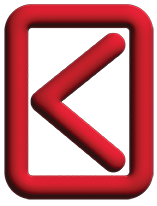
<br clear="left">

## <font color='blue'>**Expresiones `lambda`**</font>

Una de las herramientas más útiles de Python (y potencialmente confusa) es la expresión `lambda`. Las expresiones `lambda` nos permiten crear funciones "anónimas", es decir, sin nombre. Básicamente, esto significa que podemos crear funciones ad-hoc rápidamente sin necesidad de definir correctamente una función usando `def`.

Los objetos de función devueltos al ejecutar expresiones `lambda` funcionan exactamente igual que los creados y asignados por `def`.

Existe una diferencia clave que hace que lambda sea útil en roles especializados:

* El cuerpo de `lambda` es una expresión única, no un bloque de declaraciones.

* Debido a que se limita a una expresión, una `lambda` es menos general que una `def`.

* `lambda` está diseñado para codificar funciones simples y `def` maneja las tareas más grandes y complejas.

* Las funciones `def` son reutilizables, las `lambda` no.

Analicemos lentamente una expresión lambda deconstruyendo una función:

In [97]:
def square(num):
    """
    Esta función calcula el cuadrado de un número
    """
    result = num ** 2
    return result

In [98]:
square(2)

4

La podemos simplificar así:

In [99]:
def square(num):
    return num ** 2

In [100]:
square(2)

4

Idiomáticamente hablando, incluso podríamos escribir todo esto en una sola línea.

In [101]:
def square(num): return num ** 2

In [102]:
square(2)

4

Esta es justamente la forma que una expresión *`lambda`* intenta replicar. Una expresión *`lambda`* se puede escribir como:

In [103]:
lambda num: num ** 2

<function __main__.<lambda>(num)>

In [104]:
# Normalmente, no asignaremos una variable a una expresión lambda
# esto es solo para demostración!

square = lambda num: num **2

In [105]:
square(2)

4

Entonces, ¿por qué usaríamos esto?

Muchas llamadas a funciones necesitan una función creada anteriormente (más arriba en nuestro código), como en los casos de `map` y `filter`. Sin embargo, a veces solo se necesita usar la función una vez, por lo que en lugar de definirla formalmente con `def`), usamos una expresión `lambda`.

Repitamos algunos de los ejemplos anteriores con una expresión `lambda`.

In [106]:
list(map(lambda num: num ** 2, my_nums))

[1, 4, 9, 16, 25]

In [107]:
list(filter(lambda n: n % 2 == 0, nums))

[0, 2, 4, 6, 8, 10]

Ten en cuenta que cuanto más compleja sea una función, más difícil será traducirla a una expresión `lambda`, lo que significa que a veces es más fácil (y a menudo la única forma) crear la función con `def`.

A continuación algunos ejemplos más.

### Expresión `lambda` para capturar el primer caracter de una cadena

In [108]:
cadena = lambda s: s[0]
print(cadena('Hola'))

H


### Expresión `lambda` para invertir una cadena

In [109]:
cadena_invertida = lambda s: s[::-1]
print(cadena_invertida('Hola'))

aloH


Incluso puedes pasar varios argumentos a una expresión `lambda`. Nuevamente, ten en cuenta que no todas las funciones se pueden traducir a una expresión `lambda`.

### Expresión `lambda` para sumar dos números

In [110]:
suma_2_num = lambda x,y : x + y
suma_2_num(3, 4)

7

### Expresión `lambda` para sumar muchos números

In [111]:
suma_n_num = lambda *args: sum(args)
suma_n_num(1, 2, 3, 4, 5, 6, 7, 8, 9)

45

Más adelante verás que ciertas librerías de Python (e.g. Pandas) utilizan mucho las expresiones `lambda`.

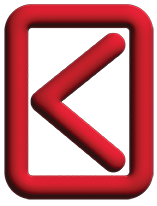
<br clear="left">
Contenido opcional

##<font color='blue'>__Ejercicios avanzados__</font>

Desarrolla los siguientes ejercicios si quieres profundizar tus conocimientos en expresiones `lambda`.

### <font color='green'>Actividad 3</font>
Dada una lista de tuplas que representan productos en un inventario, donde cada tupla contiene el nombre del producto como una cadena y su cantidad en el inventario como un número entero, escribe una expresión lambda que tome dicha lista y devuelva la misma lista ordenada por la cantidad de producto en orden descendente.

In [112]:
productos = [("manzanas", 10), ("plátanos", 40), ("bananas", 20), ("naranjas", 30)]

# Tu código aquí ...
# -> [('plátanos', 40), ('naranjas', 30), ('bananas', 20), ('manzanas', 10)]

# Usamos sorted con una lambda para ordenar por la cantidad en orden descendente
productos_ordenados = sorted(productos, key=lambda x: x[1], reverse=True)

print(productos_ordenados)


[('plátanos', 40), ('naranjas', 30), ('bananas', 20), ('manzanas', 10)]


### <font color='green'>Actividad 4</font>
Escribe una expresión lambda que tome una lista de cadenas y devuelva una nueva lista que contenga solo las cadenas que tienen una longitud de exactamente tres caracteres.

In [113]:
# Probemos tu expresión con el siguiente texto
noticia = """El Planeta. Los astrónomos han descubierto un fenómeno sorprendente en nuestro sistema solar. Un planeta, previamente no identificado, parece haber entrado en nuestro sistema solar desde el espacio interestelar.
Este planeta, provisionalmente denominado "Eris II!", ha causado un gran revuelo en la comunidad astronómica. Según los primeros informes, el planeta es aproximadamente del tamaño de Marte y parece tener una composición similar a la de los planetas gigantes gaseosos como Júpiter y Saturno.
El planeta fue descubierto por un equipo de astrónomos de la Universidad de California, que estaban utilizando el telescopio espacial Kepler para estudiar las estrellas en la constelación de Cygnus. El equipo se dio cuenta de que una estrella parecía oscurecerse periódicamente, un signo clásico de un planeta en tránsito.
"Estábamos buscando planetas alrededor de otras estrellas, así que fue una gran sorpresa cuando nos dimos cuenta de que este planeta estaba mucho más cerca de casa", dijo la Dra. Jane Foster, líder del equipo de investigación.
El descubrimiento de este nuevo planeta plantea muchas preguntas. ¿Cómo logró este planeta entrar en nuestro sistema solar sin ser detectado antes? ¿Podría haber otros planetas desconocidos en nuestro sistema solar? ¿Y qué efectos podría tener este planeta en los otros planetas de nuestro sistema solar?
"Este es un momento emocionante para la ciencia planetaria", dijo el Dr. Foster. "Cada nuevo planeta que descubrimos nos enseña algo nuevo sobre nuestro sistema solar y sobre cómo se forman y evolucionan los planetas".
La búsqueda de respuestas a estas preguntas está en marcha. Los astrónomos de todo el mundo están apuntando sus telescopios hacia este nuevo planeta, y las misiones espaciales futuras podrían ser redirigidas para estudiar este intrigante nuevo miembro de nuestro sistema solar.
Mientras tanto, el planeta Eris II sigue su camino a través de nuestro sistema solar, un recordatorio de cuánto queda por descubrir en nuestra propia esquina del universo.
"""

In [114]:
# Tu código aquí ...

# Convertimos el texto en una lista de palabras
palabras = noticia.split()

# Usamos una expresión lambda para filtrar las palabras con exactamente 3 caracteres
tres_letras = list(filter(lambda x: len(x) == 3, palabras))

print(tres_letras)

['Los', 'han', 'los', 'del', 'una', 'los', 'fue', 'por', 'que', 'las', 'dio', 'que', 'una', 'así', 'que', 'fue', 'una', 'nos', 'que', 'más', 'del', 'sin', 'ser', 'qué', 'los', 'Dr.', 'que', 'nos', 'los', 'Los', 'sus', 'las', 'ser', 'por', 'del']


### <font color='green'>Actividad 5</font>
Dada una lista de números, escribe una expresión lambda que tome dicha lista y devuelva la suma de todos los números en la lista que sean múltiplos de tres o cinco.

In [115]:
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Tu código aquí ...
# -> 33

# Usamos filter para seleccionar los múltiplos de 3 o 5, y luego sumamos los resultados
suma_multiplos = sum(filter(lambda x: x % 3 == 0 or x % 5 == 0, numeros))

print(suma_multiplos)

33


### <font color='green'>Actividad 6: Challenging</font>
Escribe una expresión lambda que tome una lista de cadenas y devuelva una nueva lista que contenga las mismas cadenas pero con todas las vocales eliminadas.

In [116]:
palabras = ["hola", "mundo", "soy", "un", "programador", "atómico"]

# Tu código aquí ...
# -> ['hl', 'mnd', 'sy', 'n', 'prgrmdr', 'tmc']

# Usamos map con una expresión lambda que elimina las vocales de cada palabra
sin_vocales = list(map(lambda x: ''.join([letra for letra in x if letra.lower() not in 'aeiou']), palabras))

print(sin_vocales)

['hl', 'mnd', 'sy', 'n', 'prgrmdr', 'tómc']


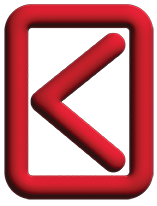

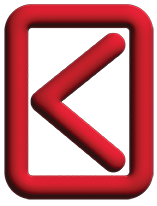
<br clear="left">
Contenido opcional

##<font color='blue'>__Función `reduce()`__</font>

La función `reduce()` es una función incorporada en Python (disponible en el módulo functools) que aplica una función de dos argumentos de manera acumulativa a los elementos de un iterable (como una lista), de manera que reduce el iterable a un único valor de salida.

Por ejemplo, si tienes una lista de números y quieres encontrar el producto de todos los números en la lista, puedes usar `reduce()` con una función que multiplica dos números.

Aquí está el código que demuestra esto:

In [117]:
from functools import reduce

# Definimos una función que multiplica dos números
def multiplica(x, y):
    return x * y

# Tenemos una lista de números
numeros = [1, 2, 3, 4, 5]

# Usamos reduce para multiplicar todos los números en la lista
producto = reduce(multiplica, numeros)

print(producto)  # Debería imprimir: 120

120


La función `reduce()` es especialmente útil cuando necesitas aplicar una función específica a todos los elementos de un iterable y acumular un resultado. Esto puede ser muy útil en varias situaciones, a continuación
 algunos ejemplos:

* __Cálculos acumulativos__: `reduce()` se puede usar para calcular la suma, el producto, el mínimo, el máximo, etc., de todos los elementos en un iterable. Por ejemplo, podrías usar `reduce()` para calcular el producto de todos los elementos en una lista de números, o para encontrar el número más grande en una lista.
* __Transformación de datos__: `reduce()` también se puede usar para transformar un iterable en una forma acumulativa. Por ejemplo, podrías usar `reduce(`) para convertir una lista de cadenas en una sola cadena que contenga todas las cadenas concatenadas, o para convertir una lista de diccionarios en un solo diccionario que contenga todas las claves y valores de los diccionarios.
* __Procesamiento de secuencias__: `reduce()` puede ser útil para procesar secuencias de datos en un solo paso. Por ejemplo, podrías usar `reduce()` para procesar una lista de transacciones y calcular el saldo de una cuenta bancaria.
* __Programación funcional__: `reduce()` es una herramienta clave en la programación funcional, un paradigma de programación en el que las funciones son ciudadanos de primera clase y el estado y los datos mutables son evitados. En la programación funcional, las funciones como `reduce()` se utilizan para evitar los bucles y las variables de estado.

### <font color='green'>Actividad 3</font>
Dada una lista de números, escribe una expresión lambda que tome dicha lista y devuelva el producto de todos los números en la lista.

In [118]:
from functools import reduce

numeros = [1, 2, 3, 4, 5]

# Tu código aquí ...
# -> 120

producto = reduce(lambda x, y: x * y, numeros)
print(producto)

120


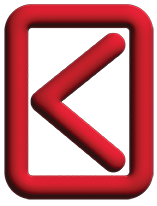